# Challenge 3

In [2]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Import the titanic file. Name your dataset `titanic`.

In [3]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [4]:
#your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [5]:
# your code here- numerical variable
titanic.select_dtypes(include=['float64','int64'])


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [6]:
#your code here- categorical variable
titanic.select_dtypes(include=['object'])

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [7]:
# your code here
plt.style.use('classic')
plt.figure(figsize=(12,6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the appropriate visulalization to show the distribution of the column `Age`

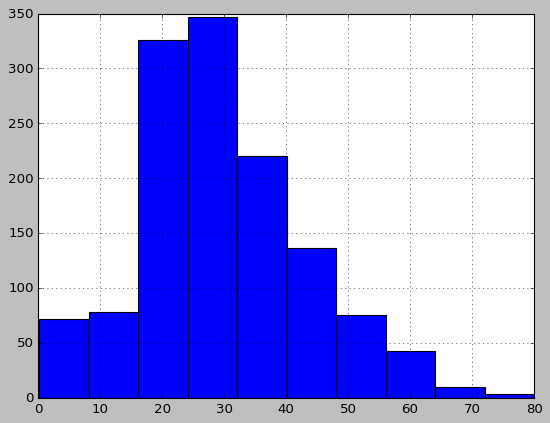

In [8]:
# your code here

titanic["Age"].hist()

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

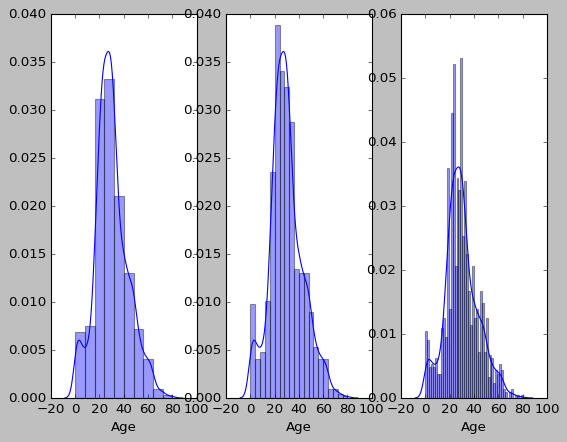

In [9]:
# your code here
plt.subplot(1,3,1)
sns.distplot(titanic['Age'], bins=10)
plt.subplot(1,3,2)
sns.distplot(titanic['Age'], bins=20)
plt.subplot(1,3,3)
sns.distplot(titanic['Age'], bins=50)

#### Whether the bin size affects your plot? Why?

In [10]:
#your comment here

#Because more bins means more values in the graphic


#### Use seaborn to show the distribution of the column `Age`

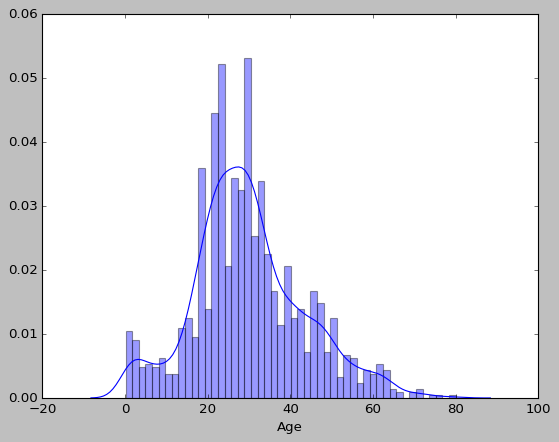

In [11]:
# your code here

sns.distplot(titanic['Age'], bins = 50)


#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

([<matplotlib.patches.Wedge at 0x7f491fdea8d0>,
 [Text(-0.9893411941747885, -0.4808367722094511, 'Male'),
  Text(1.0792813518479694, 0.5245491049970632, 'Female')],
 [Text(-0.5396406513680664, -0.26227460302333694, '64.4%'),
  Text(0.629580788577982, 0.30598697791495355, '35.6%')])

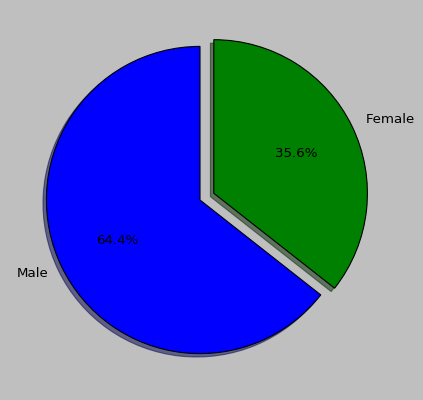

In [12]:
# your code here- 1st way

#titanic['Gender'].value_counts().plot(kind='bar')

labels = ['Male', 'Female']
explode = (0, 0.1)

plt.pie(titanic['Gender'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

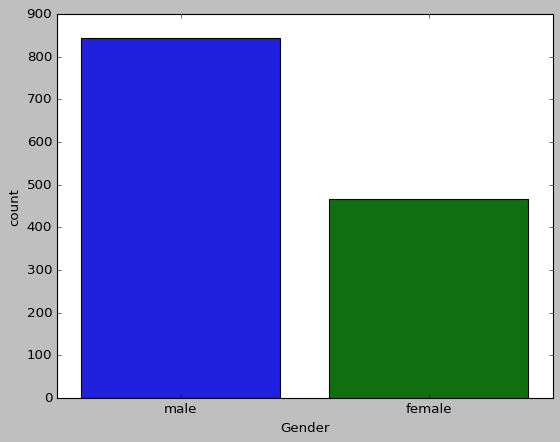

In [13]:
# your code here- 2nd way

sns.countplot(x='Gender',data=titanic)

#### Use the appropriate plot to visualize the column `Pclass` 


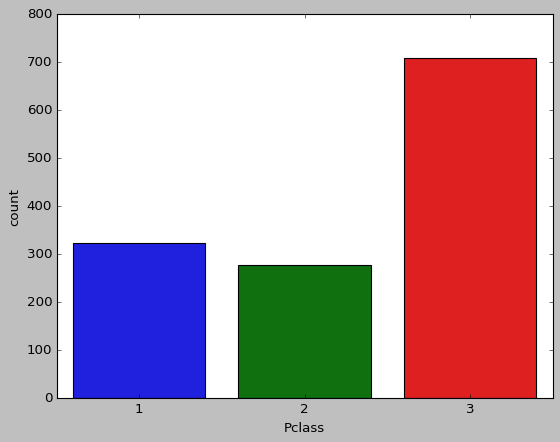

In [14]:
# your code here
sns.countplot(x ='Pclass', data=titanic)

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

Text(0.1, 1, 'count    1309.000000\nmean       29.879186\nstd        13.448335\nmin         0.170000\n25%        22.000000\n50%        28.500000\n75%        37.000000\nmax        80.000000')

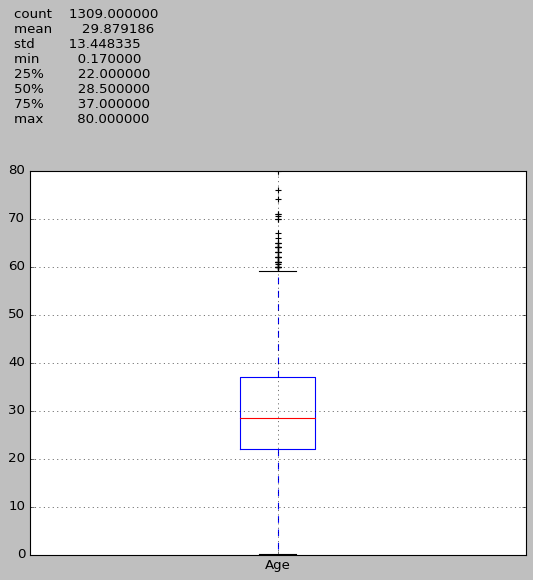

In [15]:
# your code here
#fig, ax = plt.subplots()
#ax.hist(titanic['Age'])
titanic.boxplot(column='Age')
plt.figtext(0.1,1, titanic['Age'].describe().to_string())

#### What does the previous plot tell you about the feature `Age`? Comment.

In [16]:
# your comment here
# The mean age is next to 30, the old one is 80 and there is a baby with few months.


#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

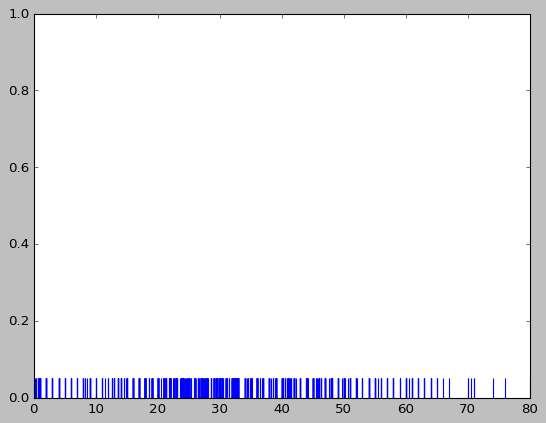

In [17]:
#your code here
sns.rugplot(titanic['Age']) 
#sns.violinplot("Age", data=titanic)

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [18]:
#your comment here
# Age of most of the passangers is close to 30

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

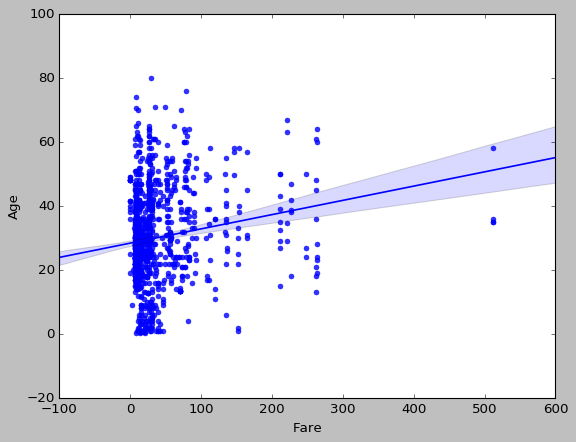

In [19]:
#your code-1st way
sns.regplot(x="Fare", y="Age", data=titanic)


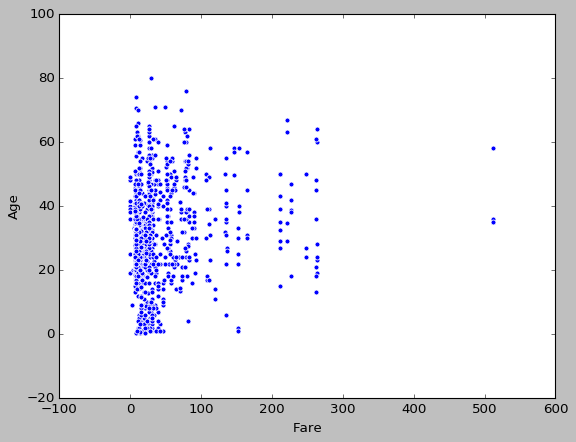

In [20]:
# your code-2nd way
sns.scatterplot(x='Fare',y='Age',data=titanic)

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

Text(0.5, 1, 'Correlation Matrix')

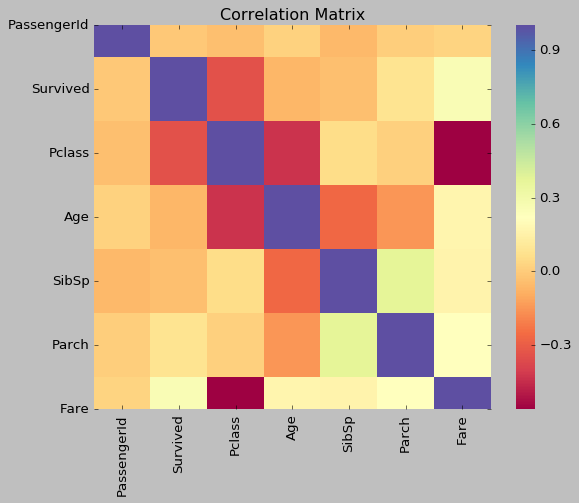

In [25]:
#your code here
sns.heatmap(titanic.corr(), fmt = '.1g', cmap='Spectral')
plt.title('Correlation Matrix')

#### According to the previous plot, what are the most correlated feature? Comment.

In [22]:
#your comment here
# Fare and Survived or Parch? and Sibsp?

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

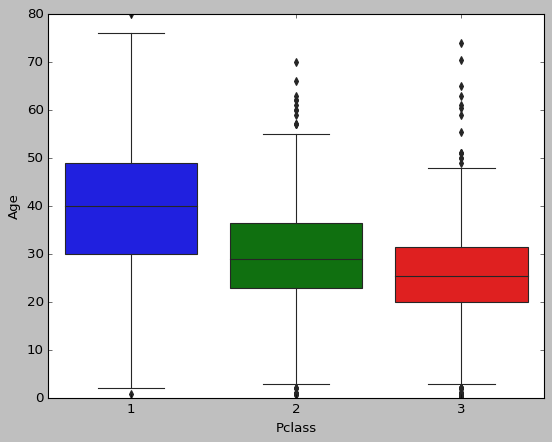

In [23]:
#your code here

sns.boxplot(x='Pclass',y='Age',data=titanic)


#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

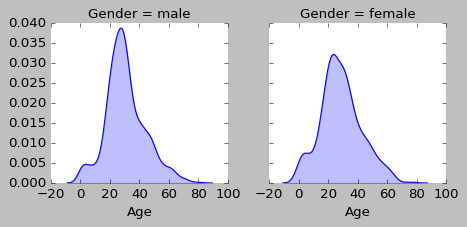

In [24]:
#your code here
#x = titanic['Age']
#y = titanic['Gender']
g = sns.FacetGrid(titanic, col="Gender")
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()